In [1]:
import pandas as pd
from IntrinsicDisorder.disorder_plotting import DisorderAnalysis as dis
from IntrinsicDisorder.intermediate import Intermediate

Loads in the necessary prediction data as generated by 'disorder_prediction.ipynb'
\
Also converts all predicted values from string to float

In [2]:
prediction_df = pd.read_hdf('Data/Predictions/iupred3_prediction.h5', 'prediction_df').astype('float')

Generates necessay lists of protein grouping
\
Writes to .csv files in /Data/Protein_lists

In [3]:
Intermediate([
            "Data/BioPlex_293T_Network_10K_Dec_2019.tsv",
            "Data/BioPlex_HCT116_Network_5.5K_Dec_2019.tsv",
            "Data/Huttlin_BioPlex3_Table_S1.xlsb",
            "Data/uniprotkb_AND_reviewed_true_AND_model_o_2024_02_28.fasta",
        ]).protein_grouping()

In [4]:
lists1 = ['proteins_uniqueppi', 'proteins_sharedppi']
labels1 = ['Unique', 'Shared']
region_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
group1 = dis(lists1, prediction_df)

In [5]:
group1.tabulated_values(lists1)

,proteins_uniqueppi,proteins_sharedppi
Protein count,14349.000,8585.000
Max sequence length,34258.000,6907.000
Average sequence length,573.184,580.694
Median sequence length,437.000,438.000
Average disorder ratio,0.223,0.230
median disorder ratio,0.135,0.148


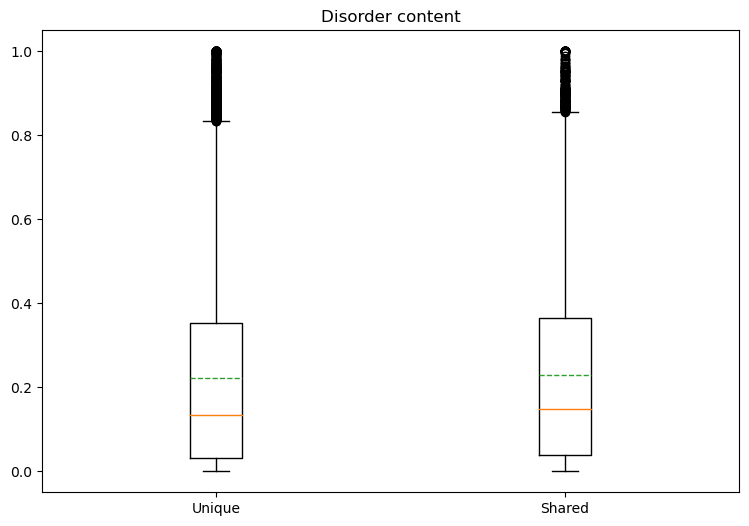

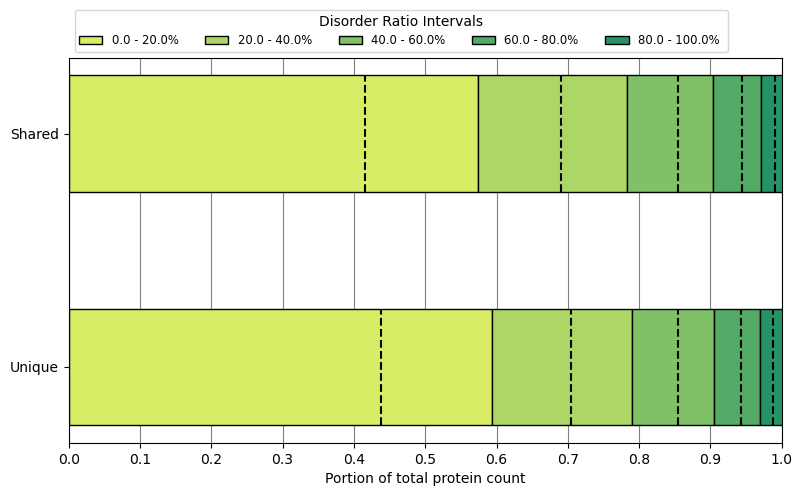

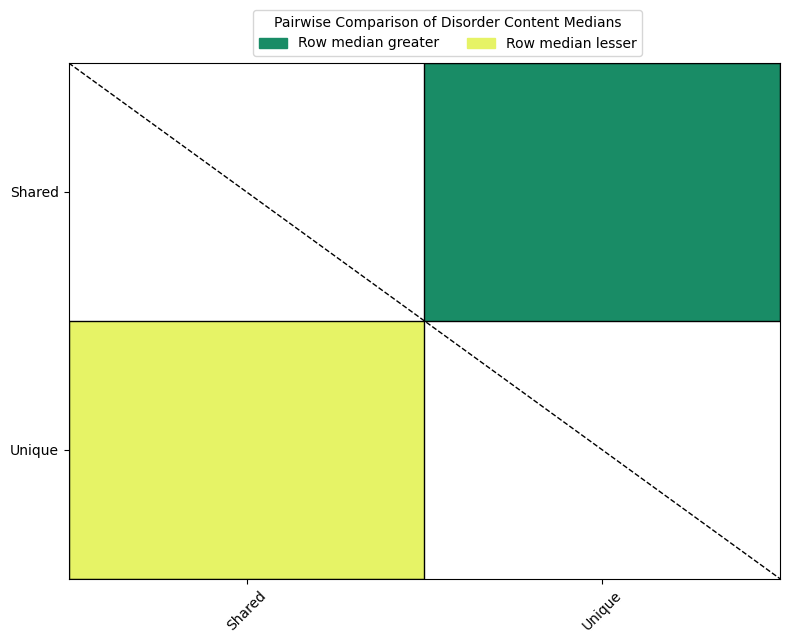

<Axes: xlabel='Longest disordered region >=', ylabel='Percent of total protein set'>

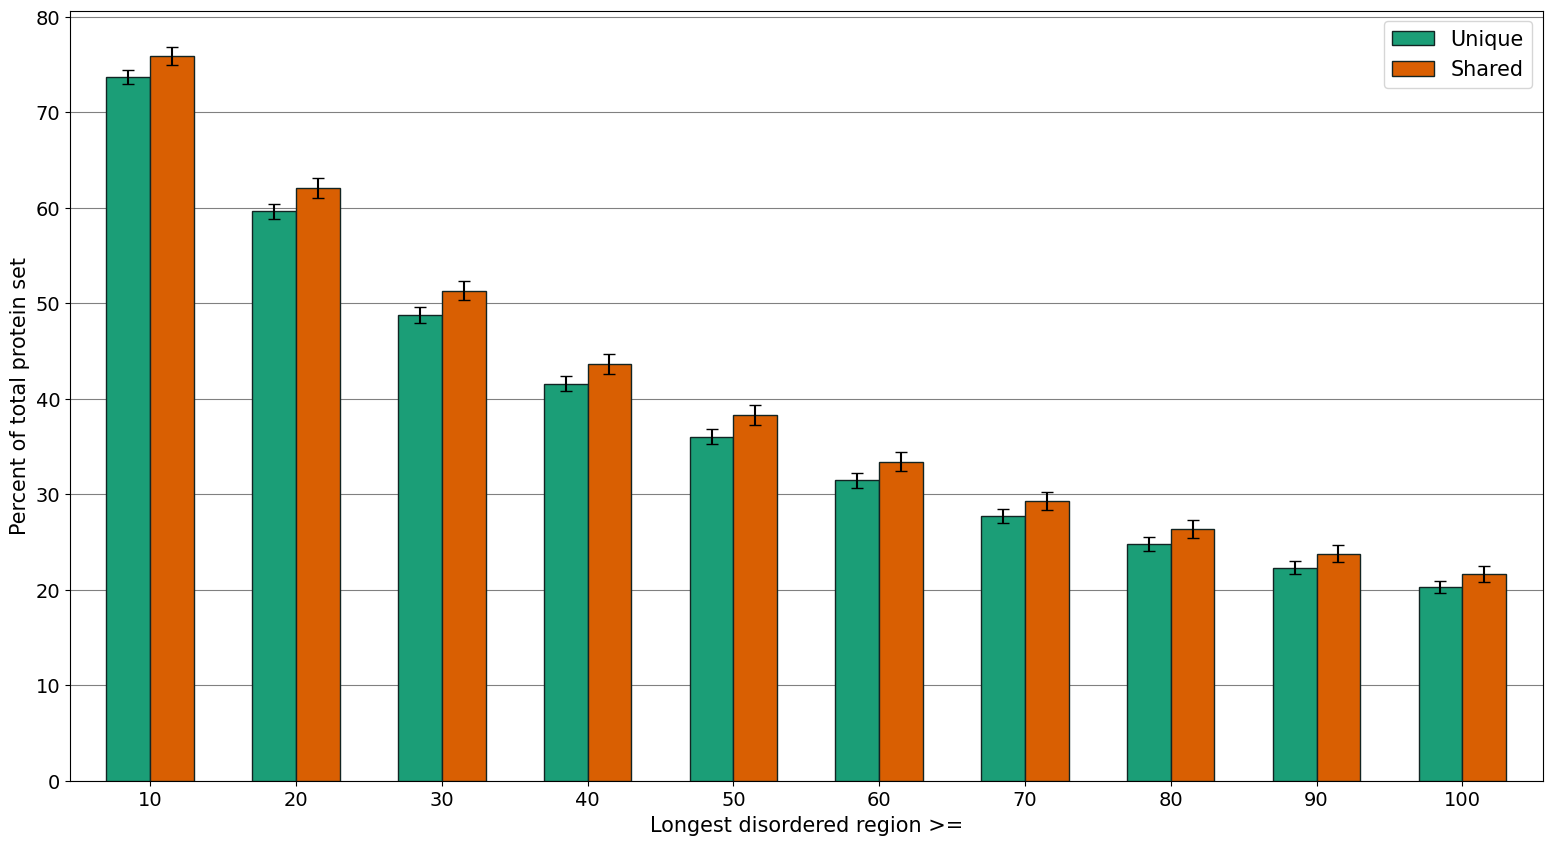

In [6]:
group1.plot_box(lists1, labels1)
group1.plot_histogram(lists1, labels1)
group1.mannwhitneyu_plot(lists1, labels1)
group1.bar_plot_regions(lists1, region_sizes, labels1, resamples = 1000)

In [7]:
lists2 = ['proteins_common_uniqueppi', 'proteins_common_sharedppi', 'proteins_common_allppi',
          'proteins_unique_uniqueppi_293T', 'proteins_unique_uniqueppi_HCT116']

region_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels2 = ['E-Unique', 'E-Shared', 'E-Common', 'E-293T', 'E-HCT-116']
group2 = dis(lists2, prediction_df)


In [8]:
group2.tabulated_values(lists2)

,proteins_common_uniqueppi,proteins_common_sharedppi,proteins_common_allppi,proteins_unique_uniqueppi_293T,proteins_unique_uniqueppi_HCT116
Protein count,1233.000,394.000,8191.000,4133.000,792.000
Max sequence length,34258.000,3432.000,6907.000,7081.000,4427.000
Average sequence length,573.399,586.157,580.431,562.547,553.402
Median sequence length,393.000,447.500,437.000,462.000,386.000
Average disorder ratio,0.186,0.250,0.229,0.227,0.200
median disorder ratio,0.097,0.173,0.147,0.137,0.098


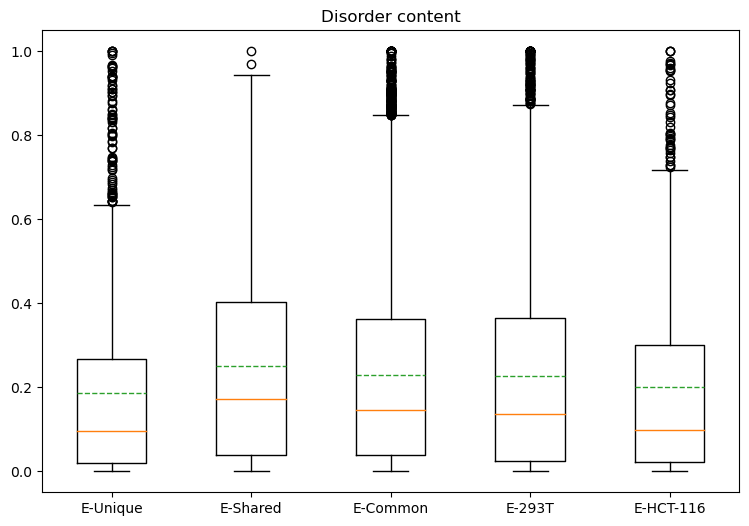

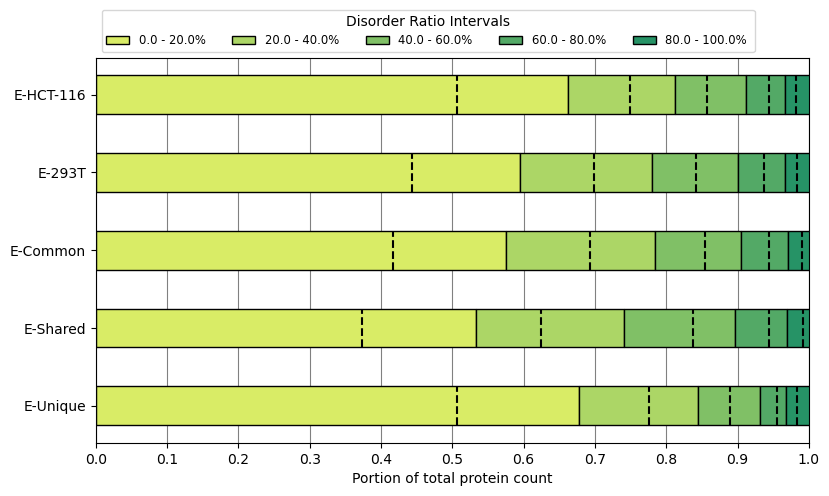

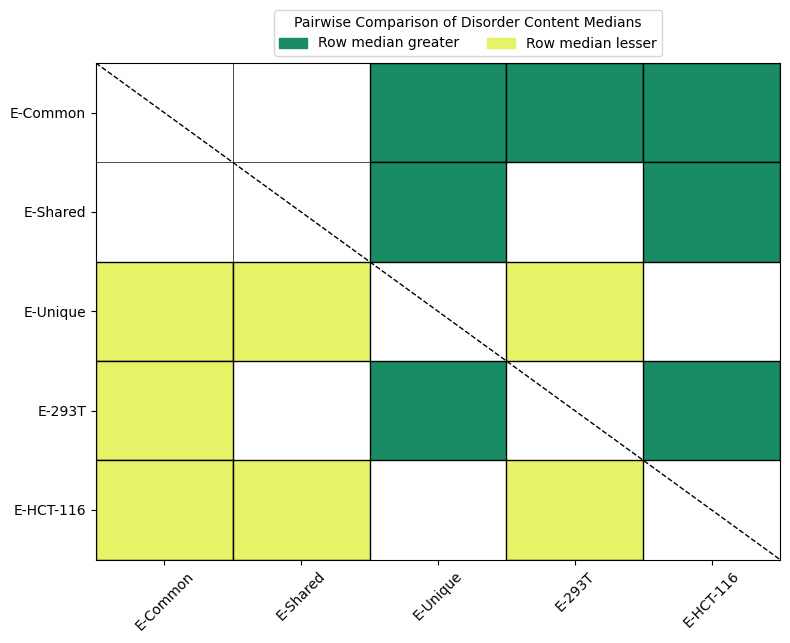

<Axes: xlabel='Longest disordered region >=', ylabel='Percent of total protein set'>

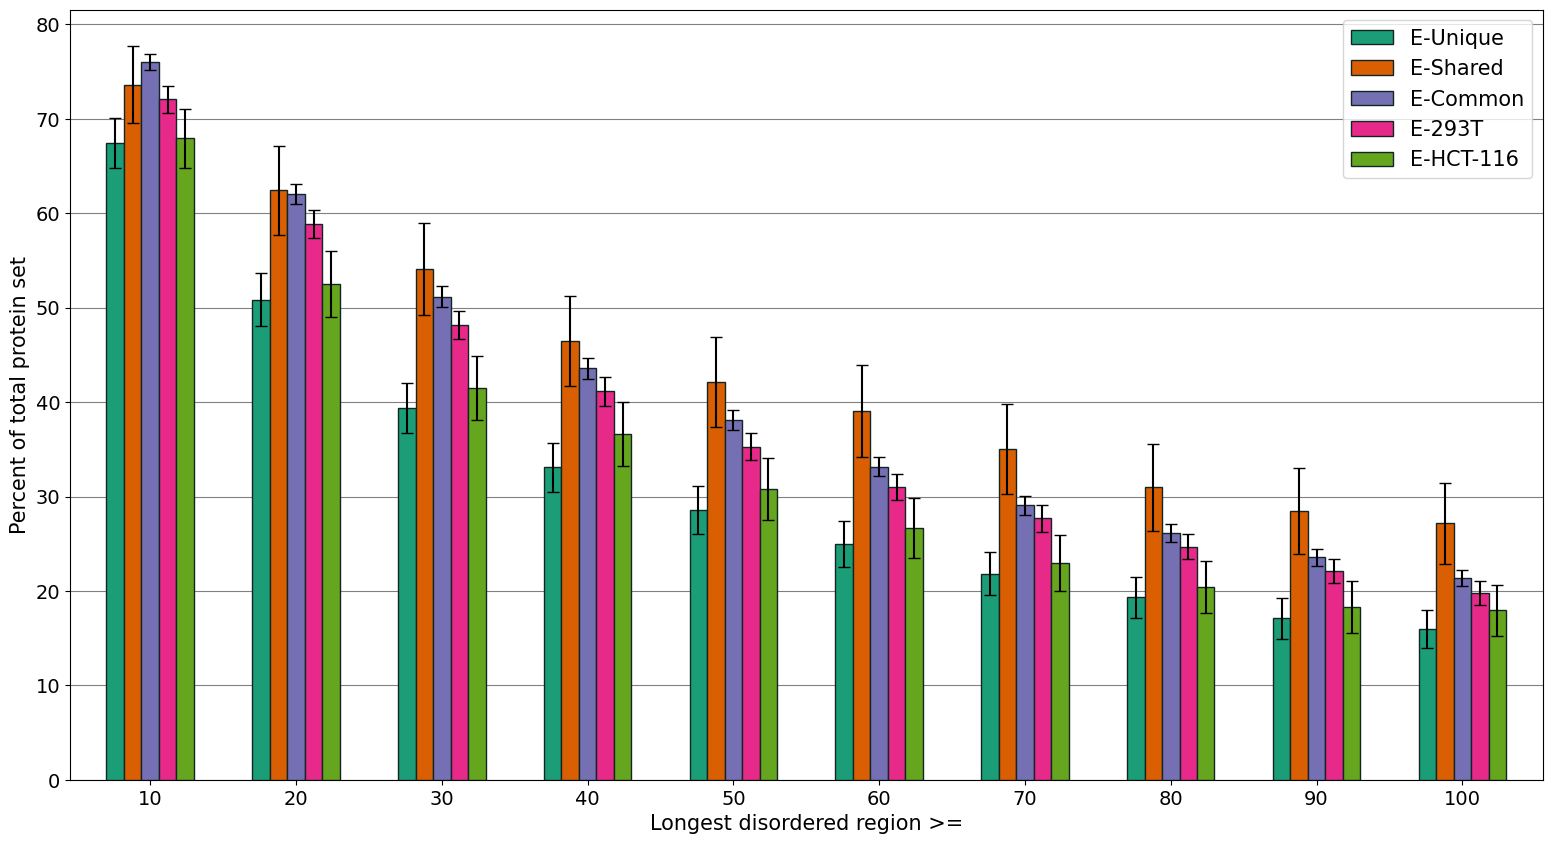

In [9]:
group2.plot_box(lists2, labels2)
group2.plot_histogram(lists2, labels2)
group2.mannwhitneyu_plot(lists2, labels2)
group2.bar_plot_regions(lists2, region_sizes, labels2, resamples = 1000)